### Importing Basic Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

### Importng data from csv file

In [2]:
columns = ['id' , 'gender' , 'area','qualification','income','marital_status','vintage','claim_amount','num_policies','policy','type_of_policy','cltv']
df = pd.read_csv("train_BRCpofr.csv" ,header=0, names=columns, index_col=False)
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [3]:
df.shape

(89392, 12)

In [4]:
df = df.drop(['id'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          89392 non-null  object
 1   area            89392 non-null  object
 2   qualification   89392 non-null  object
 3   income          89392 non-null  object
 4   marital_status  89392 non-null  int64 
 5   vintage         89392 non-null  int64 
 6   claim_amount    89392 non-null  int64 
 7   num_policies    89392 non-null  object
 8   policy          89392 non-null  object
 9   type_of_policy  89392 non-null  object
 10  cltv            89392 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 7.5+ MB


<b>There is no missing value in the dataset

In [6]:
df.dtypes.value_counts()

object    7
int64     4
dtype: int64

### Analysing Target Variable 

In [7]:
df1 = df.copy(deep = True)
df['cltv'].describe()

count     89392.000000
mean      97952.828978
std       90613.814793
min       24828.000000
25%       52836.000000
50%       66396.000000
75%      103440.000000
max      724068.000000
Name: cltv, dtype: float64

mu = 97952.83 and sigma = 90613.31


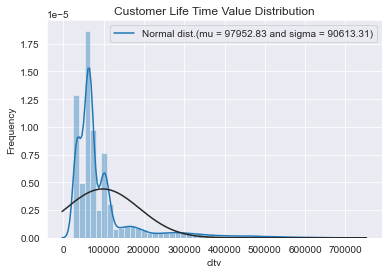

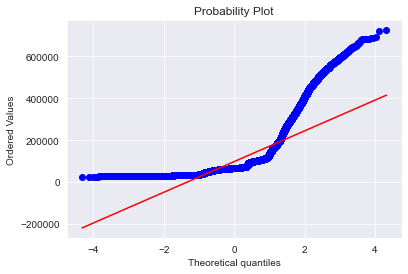

In [8]:
from scipy import stats
from scipy.stats import norm,skew

sns.distplot(df1['cltv'],fit=norm)

(mu,sigma) = norm.fit(df1['cltv'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['cltv'],plot = plt)
plt.show()

The distribution plot indicates that the target variable is right skewed with a skewness of 3.03 and left of -2.

Indicates presence of outliers.

So it is important to transform it before applying linear models. I have applied log transformation on the target variable.¶

mu = 11.24 and sigma = 0.65


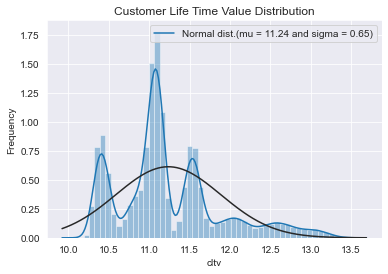

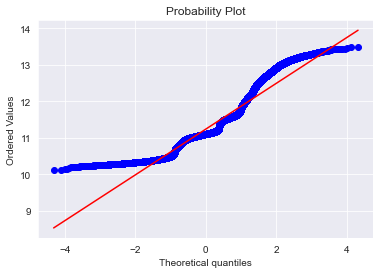

In [9]:
df1['cltv'] = np.log1p(df1['cltv'])
sns.distplot(df1['cltv'],fit=norm)

(mu,sigma) = norm.fit(df1['cltv'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['cltv'],plot = plt)
plt.show()

In [10]:
print('skewness before transformation:',df['cltv'].skew())
print('skewness after transformation:',df1['cltv'].skew())

skewness before transformation: 2.7530651590601143
skewness after transformation: 0.9091301553930867


In [11]:
df1.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,11.071455
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,13.152701
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,11.069961
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,11.491916
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,10.997707


In [12]:
df1 = df1.drop(['cltv'],axis = 1)
df_cat1 = df1.select_dtypes(include = ['object'])
df_cat1.columns

Index(['gender', 'area', 'qualification', 'income', 'num_policies', 'policy',
       'type_of_policy'],
      dtype='object')

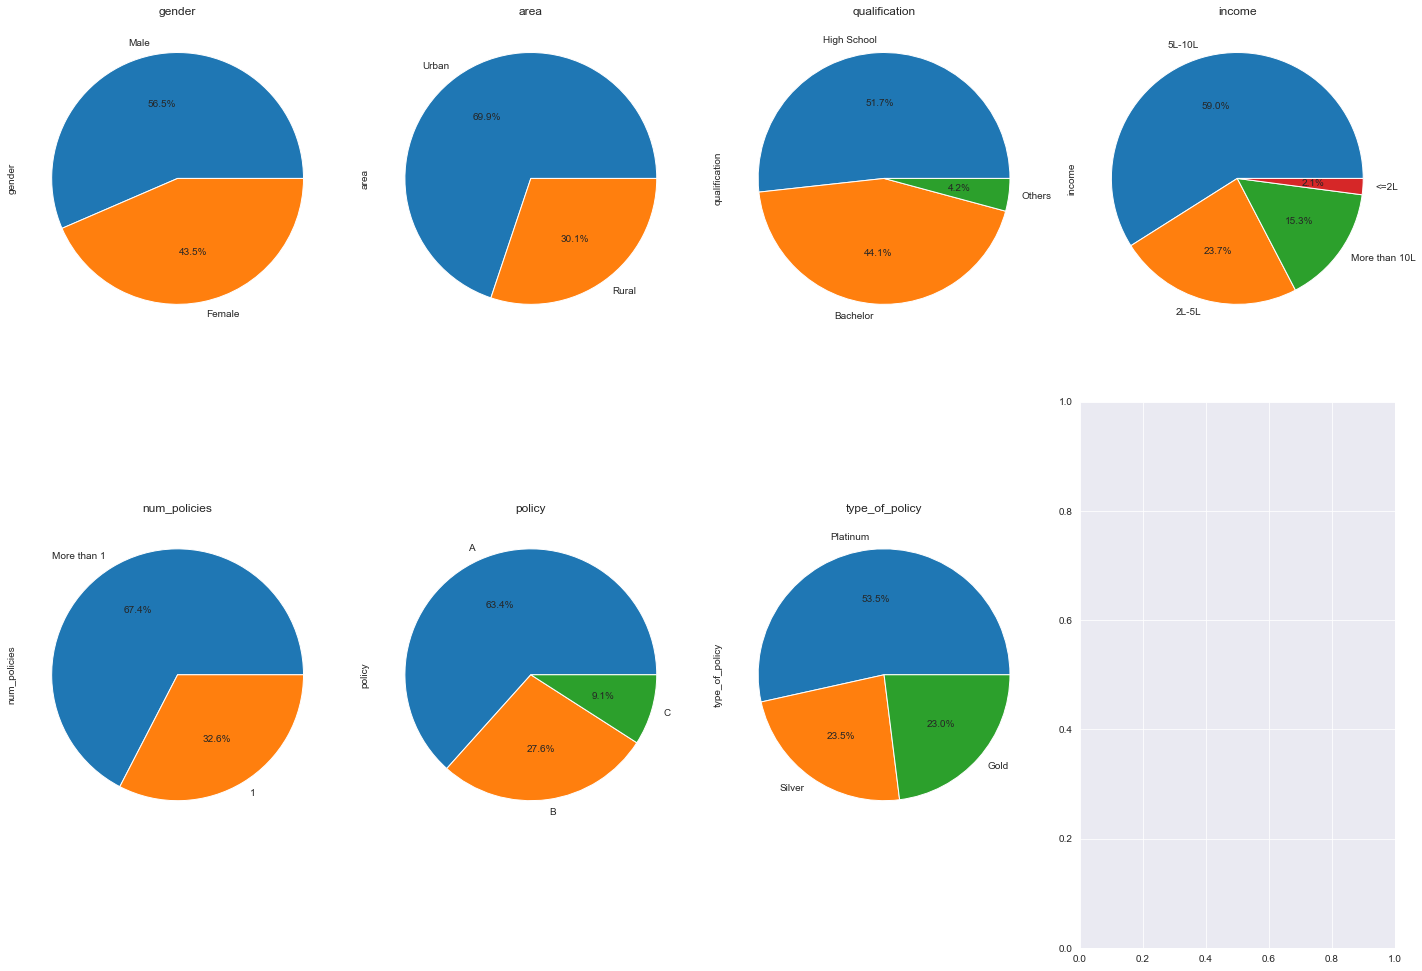

In [13]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        df[df_cat1.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(df_cat1.columns[i])

fig.tight_layout()

<b>The pie charts show the percentage of customers in each category of the categorical variables

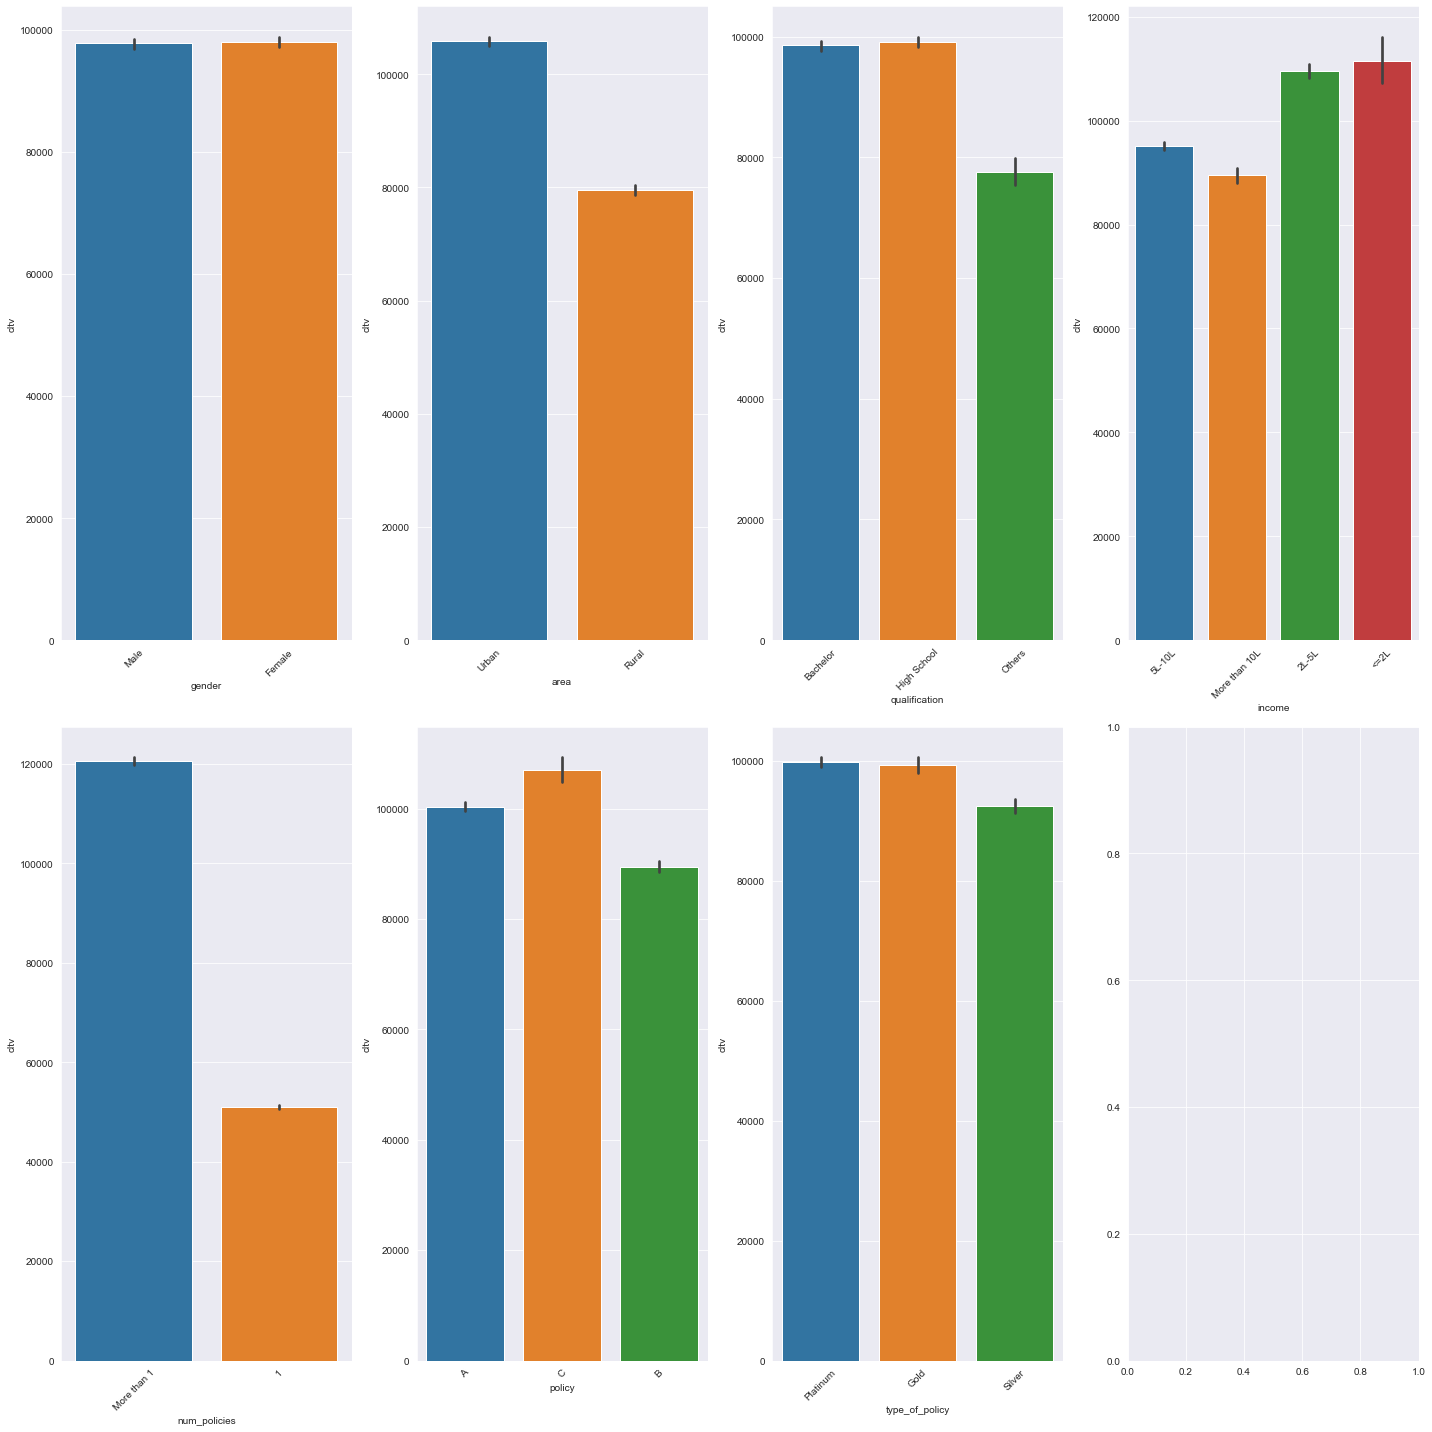

In [14]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        sns.barplot(x = df[df_cat1.columns[i]],y = df['cltv'],data = df, ax = ax )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

<b>The bar charts show the average customer life time value of each categories in the Categorical features. From the bar chart itself we can observe that some of the features are insignificant gender because the average customer lifetime value under each categories of these features are almost same.

In [15]:
df_num = df.select_dtypes(include=['int64','float'])
df_num.columns

Index(['marital_status', 'vintage', 'claim_amount', 'cltv'], dtype='object')

In [16]:
df_num_corr = df_num.corr()['cltv'].sort_values(ascending=False)
df_num_corr

cltv              1.000000
claim_amount      0.180344
vintage           0.020608
marital_status   -0.077744
Name: cltv, dtype: float64

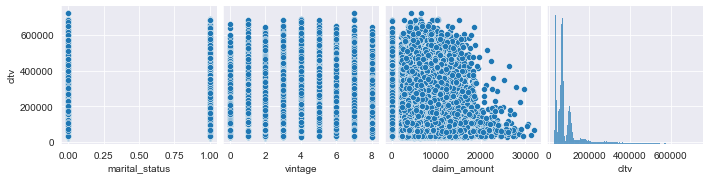

In [17]:
sns.pairplot(data=df_num,x_vars=df_num.columns[0:4],y_vars=['cltv'])

So,

- It is important that the independent features that we are using for the prediction of target variable should be strongly correlated with the target variable.
- There is no linear relationship between continuous independent features and CLV.
- Linear models would not work well for the given dataset, so we may have to choose non-linear models for better prediction.


<AxesSubplot: >

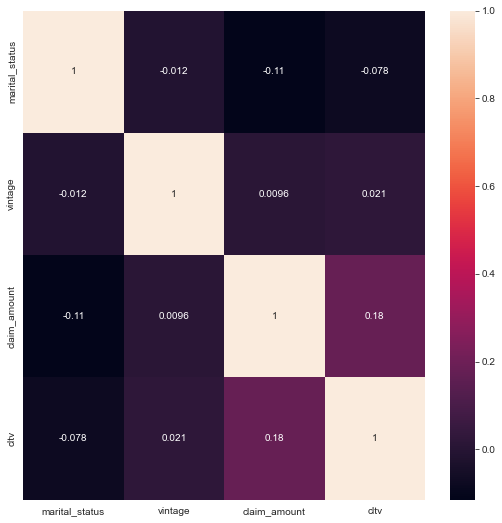

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(df_num.corr(),annot = True)

So

- None of the features are strongly correlated with the target variable cltv(Customer Life time Value).

- As compared to other variables the highest correlation of target variable is observed with claim_amount. It is 0.18 which indicates a weak positive correlation.


<b>Now I have tried to segment customers based on their Area, qualification , income to gain important insights and find which segment is more profitable segment. I Have created these graphs on Tableau

#### Education
<br>
<br>
<br>

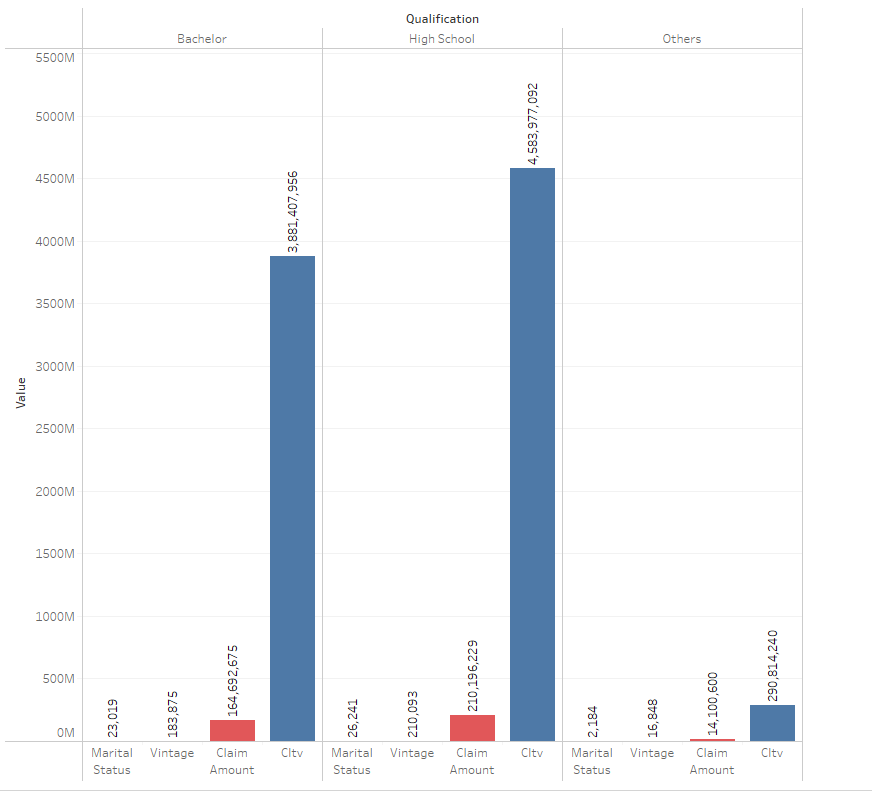

- People with high school education (or) below have lowest income but interestingly they have highest cltv  Also, their total claim amount is highest. A potential profitable group to target.
- People with Bachelor's degree have lesser claim amount and less cltv.
- Others don't have any major impact on the target

#### Area
<br>
<br>
<br>

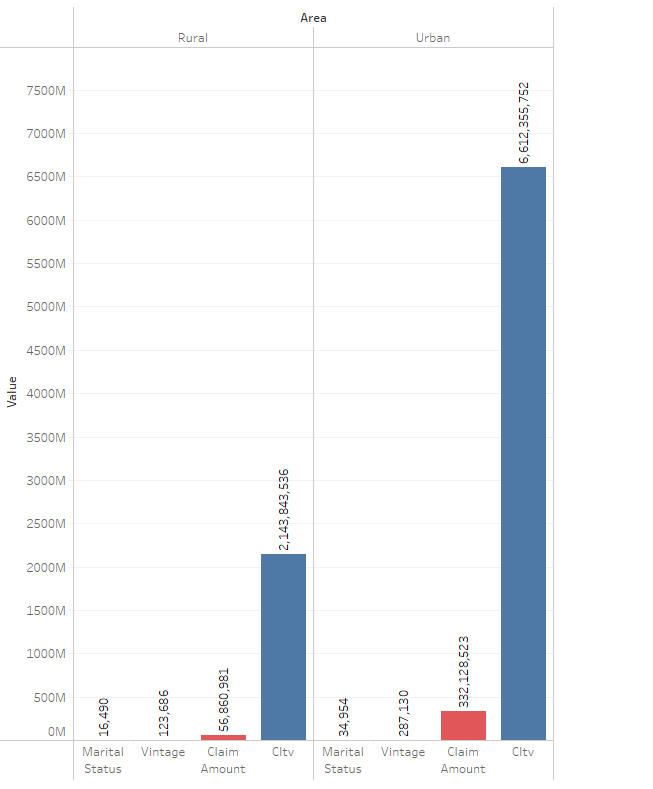

- Urban area have highest cltv and claim amount

#### Income
<br>
<br>
<br>

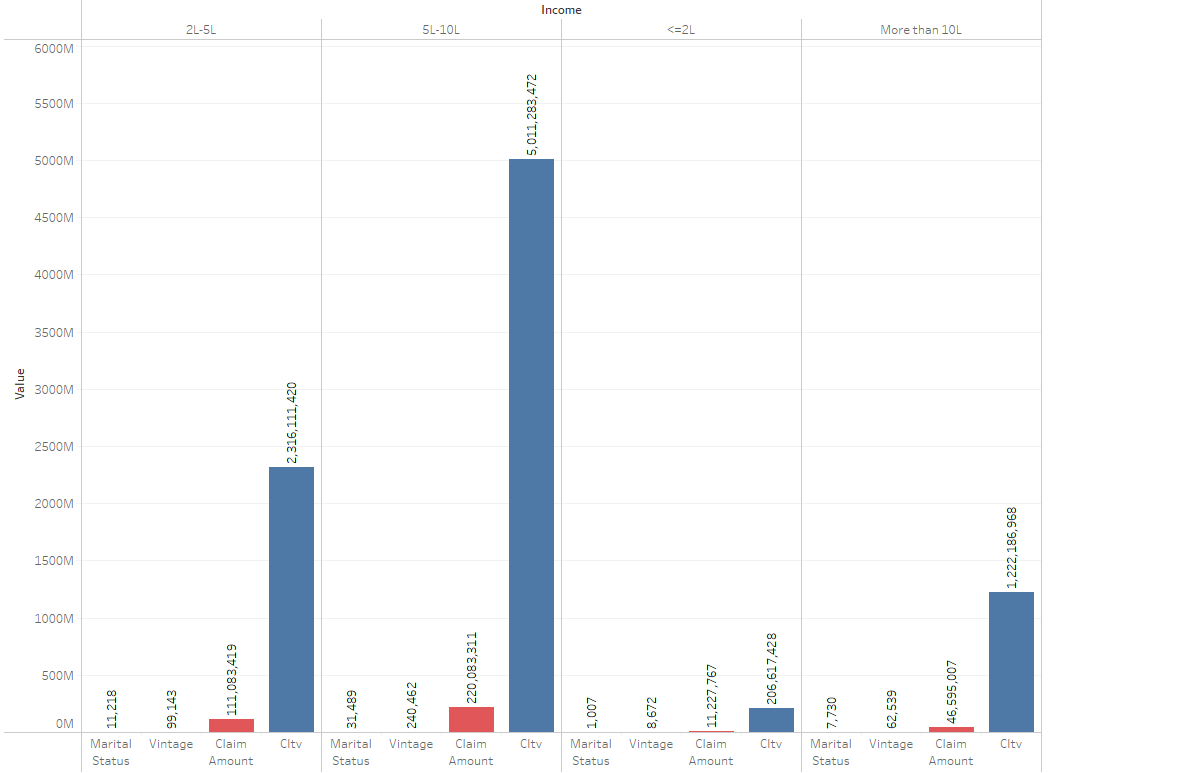

- Customer with 5L-10L have high cltv.

#### Num of policy
<br>
<br>
<br>

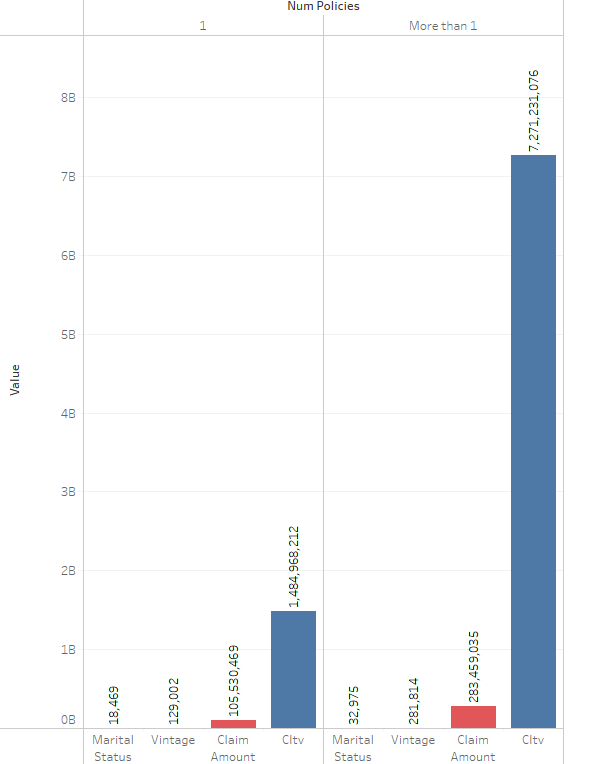

- Customer with more than 1 holding policy are high cltv.

#### Policy and it's each category
<br>
<br>
<br>

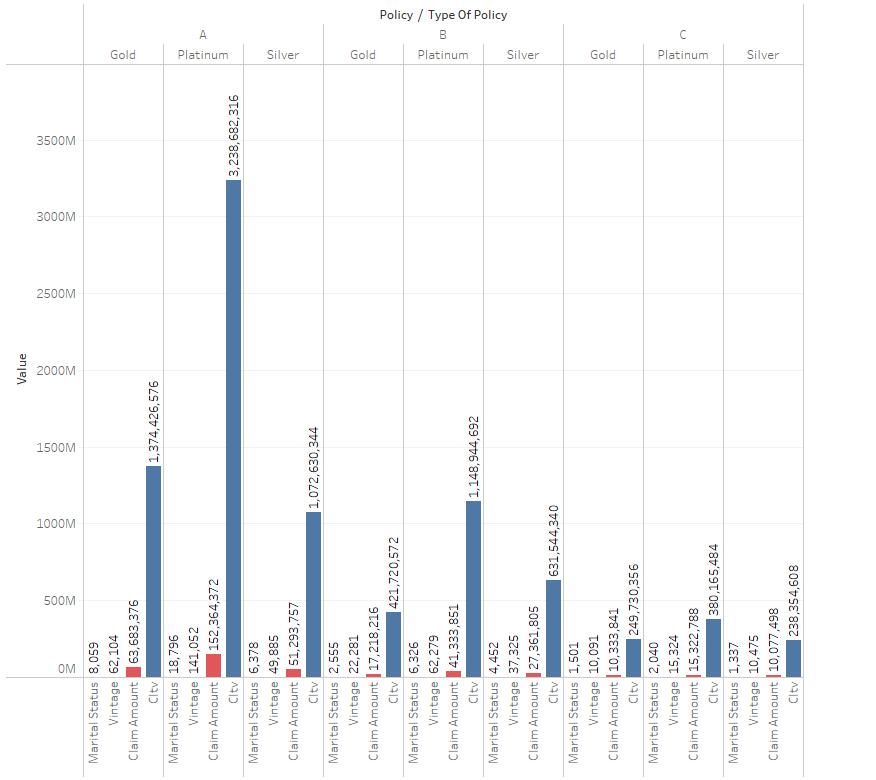

- Policy A and with type Platinum have more cltv and also those who take platinium type policy are haveing more cltv

### Data Preprocessing

In [19]:
y = df['cltv']
df1.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold


In [20]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.shape

(89392, 15)

In [21]:
num_features = df.dtypes[df.dtypes != 'object'].index
skewed_feat = df[num_features].apply(lambda x: x.skew()).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feat,columns = ['skew'])
skewness

,skew
cltv,2.753065
claim_amount,1.044233
marital_status,-0.305457
vintage,-0.378267


<b>It is important to transform the skewed features before applying linear models

In [22]:
from scipy.special import boxcox1p
lam = 0.15
df1['claim_amount'] = boxcox1p(df1['claim_amount'],lam)

### Modelling

<b>Let's start with the base linear model without doing any transformation and feature elimination and check the score of R2

In [23]:
import statsmodels.api as sm
Xc = sm.add_constant(df1)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:20:34   Log-Likelihood:            -1.1401e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89376   BIC:                         2.280e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       4.69e+04   1419.674     33.035      0.000    4.41e+04    4.97e+04
marital_status            -8222.6306    572.427    -14.365      0.000   -9344.582   -7100.679
vintage                     249.8213    122.941      2.032      0.042       8.857     490.785
claim_amount                752.6216     46.790     16.085      0.000     660.914     844.330
gender_Male                2663.7932    569.573      4.677      0.000    1547.435    3780.152
area_Urban                 8728.0100    721.263     12.101      0.000    7314.341    1.01e+04
qualification_High School  -649.5869    577.567     -1.125      0.261   -1781.612     482.438
qualification_Others      -8080.0220   1435.845     -5.627      0.000   -1.09e+04   -5265.779
income_5L-10L             -5703.0413    704.242     -8.098      0.000   -7083.348   -4322.734
income_<=2L               -4022.0366   2033.426     -1.978      0.048   -8007.531     -36.542
income_More than 10L      -7945.9477    951.219     -8.353      0.000   -9810.327   -6081.568
num_policies_More than 1   6.581e+04    611.429    107.632      0.000    6.46e+04     6.7e+04
policy_B                  -8536.0207    669.144    -12.757      0.000   -9847.536   -7224.506
policy_C                   9442.9287    997.737      9.464      0.000    7487.373    1.14e+04
type_of_policy_Platinum    -624.8439    699.730     -0.893      0.372   -1996.308     746.620
type_of_policy_Silver     -2400.7227    827.578     -2.901      0.004   -4022.769    -778.677
==============================================================================
Omnibus:                    51296.312   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           404972.116
Skew:                           2.740   Prob(JB):                         0.00
Kurtosis:                      11.872   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>We got a very low r2 value of 0.148, it proves that our conclusion from the scatterplot that the linear model will not work well for this dataset is true

<b>Let's check the score after transforming target variable

In [24]:
y_transformed = np.log1p(y)
model2 = sm.OLS(y_transformed,Xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     2707.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:20:34   Log-Likelihood:                -71697.
No. Observations:               89392   AIC:                         1.434e+05
Df Residuals:                   89376   BIC:                         1.436e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        10.6969      0.009   1168.184      0.000      10.679      10.715
marital_status               -0.0555      0.004    -15.034      0.000      -0.063      -0.048
vintage                       0.0033      0.001      4.215      0.000       0.002       0.005
claim_amount                  0.0059      0.000     19.429      0.000       0.005       0.006
gender_Male                   0.0062      0.004      1.682      0.093      -0.001       0.013
area_Urban                    0.0471      0.005     10.132      0.000       0.038       0.056
qualification_High School    -0.0064      0.004     -1.722      0.085      -0.014       0.001
qualification_Others         -0.0781      0.009     -8.429      0.000      -0.096      -0.060
income_5L-10L                -0.0374      0.005     -8.240      0.000      -0.046      -0.029
income_<=2L                  -0.0267      0.013     -2.036      0.042      -0.052      -0.001
income_More than 10L         -0.0512      0.006     -8.339      0.000      -0.063      -0.039
num_policies_More than 1      0.7286      0.004    184.739      0.000       0.721       0.736
policy_B                     -0.0511      0.004    -11.851      0.000      -0.060      -0.043
policy_C                      0.0582      0.006      9.051      0.000       0.046       0.071
type_of_policy_Platinum      -0.0030      0.005     -0.658      0.511      -0.012       0.006
type_of_policy_Silver        -0.0175      0.005     -3.282      0.001      -0.028      -0.007
==============================================================================
Omnibus:                    14730.280   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24526.056
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                       4.300   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>The r2 value increased by just 30%

<b><I>Let's apply ols model after applying polynomial features. Among the continuous features that we have 'claim_amount' is the only feature which are heteroscedastic in nature. So we will be use this feature for polynomial regression.

In [25]:
X_up = df1[['claim_amount']]
from sklearn.preprocessing import PolynomialFeatures
qr = PolynomialFeatures(degree = 4)
x_qr = qr.fit_transform(X_up)
x_main = pd.DataFrame(x_qr)
x_main.head()

,0,1,2,3,4
0,1.0,17.785749,316.332879,5626.217299,100066.490570
1,1.0,17.310680,299.659638,5187.312063,89795.898548
2,1.0,15.018099,225.543312,3387.231902,50869.785691
3,1.0,0.000000,0.000000,0.000000,0.000000
4,1.0,16.015589,256.499099,4107.984214,65791.787832


In [26]:
df2= pd.concat([df1,x_main.iloc[:,2:]],axis = 1)
df2.head()

,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,2,3,4
0,1,5,17.785749,1,1,0,0,1,0,0,1,0,0,1,0,316.332879,5626.217299,100066.490570
1,0,8,17.310680,1,0,1,0,1,0,0,1,0,0,1,0,299.659638,5187.312063,89795.898548
2,1,8,15.018099,1,1,0,0,1,0,0,1,0,0,1,0,225.543312,3387.231902,50869.785691
3,0,7,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,0.000000,0.000000,0.000000
4,1,6,16.015589,1,1,1,0,0,0,1,1,0,0,0,0,256.499099,4107.984214,65791.787832


In [27]:
# df2 = df2.drop(['gender_Male','income_More than 10L','type_of_policy_Silver','policy_B','income_5L-10L','qualification_Others','marital_status'],axis = 1)

In [28]:
Xc = sm.add_constant(df2)
model3 = sm.OLS(y_transformed,Xc).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2318.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:20:34   Log-Likelihood:                -71312.
No. Observations:               89392   AIC:                         1.427e+05
Df Residuals:                   89373   BIC:                         1.428e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        10.7117      0.009   1172.135      0.000      10.694      10.730
marital_status               -0.0470      0.004    -12.736      0.000      -0.054      -0.040
vintage                       0.0032      0.001      4.071      0.000       0.002       0.005
claim_amount                  0.6920      0.064     10.837      0.000       0.567       0.817
gender_Male                   0.0050      0.004      1.376      0.169      -0.002       0.012
area_Urban                    0.0366      0.005      7.731      0.000       0.027       0.046
qualification_High School    -0.0089      0.004     -2.390      0.017      -0.016      -0.002
qualification_Others         -0.0779      0.009     -8.447      0.000      -0.096      -0.060
income_5L-10L                -0.0317      0.005     -6.988      0.000      -0.041      -0.023
income_<=2L                  -0.0300      0.013     -2.299      0.021      -0.056      -0.004
income_More than 10L         -0.0451      0.006     -7.368      0.000      -0.057      -0.033
num_policies_More than 1      0.7222      0.004    183.471      0.000       0.714       0.730
policy_B                     -0.0452      0.004    -10.471      0.000      -0.054      -0.037
policy_C                      0.0591      0.006      9.220      0.000       0.047       0.072
type_of_policy_Platinum      -0.0043      0.004     -0.964      0.335      -0.013       0.004
type_of_policy_Silver        -0.0178      0.005     -3.349      0.001      -0.028      -0.007
2                            -0.1177      0.011    -11.107      0.000      -0.138      -0.097
3                             0.0066      0.001     11.280      0.000       0.005       0.008
4                            -0.0001   1.06e-05    -11.254      0.000      -0.000   -9.83e-05
==============================================================================
Omnibus:                    14685.617   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24540.665
Skew:                           1.100   Prob(JB):                         0.00
Kurtosis:                       4.322   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>There isn't any appreciable increase in r2

### So it's better to go for non linear models. I have splitted the dataset in 70:30 ratio.

In [29]:
for feature_name in 'vintage' , 'claim_amount',2:
        max_value = df2[feature_name].max()
        min_value = df2[feature_name].min()
        df2[feature_name] = (df2[feature_name] - min_value) / (max_value - min_value)

In [30]:
df2.head()

,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,2,3,4
0,1,0.625,0.713790,1,1,0,0,1,0,0,1,0,0,1,0,0.509497,5626.217299,100066.490570
1,0,1.000,0.694724,1,0,1,0,1,0,0,1,0,0,1,0,0.482642,5187.312063,89795.898548
2,1,1.000,0.602717,1,1,0,0,1,0,0,1,0,0,1,0,0.363268,3387.231902,50869.785691
3,0,0.875,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,0.000000,0.000000,0.000000
4,1,0.750,0.642749,1,1,1,0,0,0,1,1,0,0,0,0,0.413126,4107.984214,65791.787832


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2,y_transformed,test_size = 0.3,random_state=4)

### Decision Tree Regressor

I did the hyperparameter tuning using Randomized search CV and best parameters that I got is mentioned in the dt_tuned model

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint as sp_randint
dtc = DecisionTreeRegressor()

params = {'max_depth': sp_randint(2,20),'min_samples_leaf': sp_randint(1,20),
         'min_samples_split': sp_randint(2,40)}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=100,cv =10, scoring = 'r2')
rsearch.fit(df2,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A6F0154700>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A6F01547F0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A6F2906640>},
                   scoring='r2')

In [33]:
from sklearn.linear_model import Lasso,ElasticNet,LassoLarsIC,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
import re

In [34]:
dt = DecisionTreeRegressor()
dt_tuned = DecisionTreeRegressor(max_depth =  8, min_samples_leaf =  18, min_samples_split = 22)
dt_bag = BaggingRegressor(base_estimator=dt_tuned,n_estimators=10,random_state=0)
dt_boost = AdaBoostRegressor(base_estimator=dt_tuned,n_estimators=50,random_state=0)

In [35]:
for model,name in zip([dt,dt_tuned,dt_bag,dt_boost],['decision_tree','dt_tuned','dt_bag','dt_boost']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

model: decision_tree
train r2: 0.9423875246864789
test r2: -0.34515110181614683
Mape: 4.822123693497579
Adjusted R squared score is : 0.34605459522383697
************************************************************
model: dt_tuned
train r2: 0.3319055414283921
test r2: 0.31824346331227005
Mape: 3.5945147247923437
Adjusted R squared score is : 0.31778555004459674
************************************************************
model: dt_bag
train r2: 0.33616624715312193
test r2: 0.3233568340698528
Mape: 3.5840959672004757
Adjusted R squared score is : 0.3229023552838256
************************************************************
model: dt_boost
train r2: -0.012445800792981743
test r2: -0.029016254022100396
Mape: 5.15984859813436
Adjusted R squared score is : 0.029707410131373013
************************************************************


In [36]:
X_imp=pd.DataFrame(dt_tuned.feature_importances_,columns=['Imp'],index=x_test.columns)
X_imp=X_imp.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(250,50))
plt.xlabel('Feature Names',fontsize=80)
plt.xticks(rotation=90,fontsize=150)
sns.barplot(x=X_imp.index,y=X_imp['Imp'])
X_imp.T

,num_policies_More than 1,2,3,area_Urban,policy_B,marital_status,vintage,claim_amount,policy_C,4,gender_Male,qualification_Others,type_of_policy_Platinum,income_More than 10L,income_5L-10L,type_of_policy_Silver,qualification_High School,income_<=2L
Imp,0.894287,0.049216,0.011477,0.010739,0.005363,0.004844,0.004773,0.003846,0.003774,0.003297,0.001833,0.001256,0.001252,0.001213,0.001012,0.000758,0.00072,0.000339


### Random Forest Regressor

In [37]:
rf = RandomForestRegressor()
rf_tuned = RandomForestRegressor(max_depth =  36,max_features = 25,min_samples_leaf = 2,min_samples_split = 7,n_estimators=432)

In [38]:
for model,name in zip([rf,rf_tuned],['Random Forest','Random Forest Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

model: Random Forest
train r2: 0.8472269915618559
test r2: 0.23218419588801298
Mape: 3.815713970286716
Adjusted R squared score is : 0.2316684794629965
************************************************************
model: Random Forest Tuned
train r2: 0.678271973095327
test r2: 0.27557349067840375
Mape: 3.709068219702974
Adjusted R squared score is : 0.27508691740448354
************************************************************


In [39]:
X_imp=pd.DataFrame(rf_tuned.feature_importances_,columns=['Imp'],index=x_test.columns)
X_imp=X_imp.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(250,50))
plt.xlabel('Feature Names',fontsize=80)
plt.xticks(rotation=90,fontsize=150)
sns.barplot(x=X_imp.index,y=X_imp['Imp'])
X_imp.T

,num_policies_More than 1,vintage,4,claim_amount,2,3,qualification_High School,income_5L-10L,type_of_policy_Platinum,gender_Male,type_of_policy_Silver,marital_status,income_More than 10L,policy_B,policy_C,area_Urban,qualification_Others,income_<=2L
Imp,0.409351,0.086935,0.082977,0.082946,0.082593,0.082563,0.02565,0.022132,0.021758,0.021069,0.017119,0.014991,0.01209,0.010218,0.009403,0.008654,0.005512,0.00404


### GradientBoost

In [40]:
gboost = GradientBoostingRegressor(n_estimators=1000)

In [41]:
for model,name in zip([gboost],['Gradient Boost']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)

model: Gradient Boost
train r2: 0.3609293482234006
test r2: 0.32082777890210146
Mape: 3.586017427487008
Adjusted R squared score is : 0.32037160143354815


### XGBoost Regressor¶

In [42]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
model_xgb = xgb.XGBRegressor()
model_xgb_tuned = xgb.XGBRegressor(learning_rate = 0.1,max_depth= 6,min_child_weight= 4,n_estimators= 70)
X_train = x_train
x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]

In [43]:
for model,name in zip([model_xgb,model_xgb_tuned],['XG Boost','XG Boost Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

model: XG Boost
train r2: 0.39458146044872155
test r2: 0.31424318977273
Mape: 3.599618959636403
Adjusted R squared score is : 0.31378258965391614
************************************************************
model: XG Boost Tuned
train r2: 0.34264188338643287
test r2: 0.3263245917263974
Mape: 3.5633445963780637
Adjusted R squared score is : 0.32587210628481655
************************************************************


### Among all the models I have applied Random Forest is Performing best¶

###### Reading Test file

In [134]:
columns = ['id' , 'gender' , 'area','qualification','income','marital_status','vintage','claim_amount','num_policies','policy','type_of_policy']
data = pd.read_csv("test_koRSKBP.csv" ,header=0, names=columns, index_col=False)
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [135]:
data['claim_amount'] = boxcox1p(df1['claim_amount'],lam)

In [145]:
data1 = pd.get_dummies(data,drop_first=True)
data1 = data1.drop(['id'] ,axis = 1)
data1.shape , df1.shape

((59595, 15), (89392, 15))

In [146]:
X_up1 = data1[['claim_amount']]
qr1 = PolynomialFeatures(degree = 4)
x_qr1 = qr1.fit_transform(X_up1)
x_main1 = pd.DataFrame(x_qr1)
x_main1.head()

,0,1,2,3,4
0,1.0,3.684350,13.574437,50.012981,184.265338
1,1.0,3.644657,13.283523,48.413884,176.451991
2,1.0,3.439824,11.832391,40.701344,140.005470
3,1.0,0.000000,0.000000,0.000000,0.000000
4,1.0,3.531821,12.473762,44.055099,155.594740


In [147]:
data2= pd.concat([data1,x_main1.iloc[:,2:]],axis = 1)
data2.head()

,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver,2,3,4
0,0,6,3.684350,0,0,1,0,1,0,0,1,1,0,0,1,13.574437,50.012981,184.265338
1,0,4,3.644657,0,1,1,0,0,0,0,1,0,0,1,0,13.283523,48.413884,176.451991
2,1,7,3.439824,1,0,1,0,1,0,0,1,1,0,0,0,11.832391,40.701344,140.005470
3,1,2,0.000000,0,0,0,0,0,0,1,1,1,0,0,1,0.000000,0.000000,0.000000
4,0,5,3.531821,0,1,1,0,0,0,0,1,1,0,0,1,12.473762,44.055099,155.594740


In [155]:
test_pred = test_pred_xg+25000

In [160]:
#creating the sample submission file
sample_submission = pd.DataFrame()
sample_submission['id'] = data['id']
sample_submission['cltv'] = test_pred_                 
sample_submission.to_csv("sample_submission.csv",index=False)